# IBM HR Analytics Employee Attrition & Performance Exploratory Data Analysis 📊

## Importing dependencies

In [1]:
import sys
import os
import warnings

warnings.filterwarnings("ignore")
sys.path.append(os.path.abspath(os.path.join("..", "scripts", "utils")))

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Utils
from visualization import save_figure, cat_distribution
from data_helpers import get_cols_names, print_cols_summary

In [2]:
DATA_PATH = os.path.join("..", "data", "raw", "hr_employee_attrition.csv")

# Setting parameters
pd.set_option("display.max_columns", 40)
pd.set_option("display.max_rows", 40)
pd.set_option("display.float_format", lambda x: f"{x:.2f}")

mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

plt.style.use("ggplot")
sns.set_style("darkgrid", {"grid.color": ".8"})

## EDA 📈
### Data Loading 🗃️

In [3]:
df = pd.read_csv(DATA_PATH)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Understanding the Dataset 💡

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
print(f"Samples: {df.shape[0]}")
print(f"Features: {df.shape[1]}")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Duplicates count: {df.duplicated(keep=False).sum()}")

Samples: 1470
Features: 35
Missing values: 0
Duplicates count: 0


In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.00,1024.87,2.72,65.89,2.73,2.06,2.73,6502.93,14313.10,2.69,15.21,3.15,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,1.10,4707.96,7117.79,2.50,3.66,0.36,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,1009.00,2094.00,0.00,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,2.00,2911.00,8047.00,1.00,12.00,3.00,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,1020.50,3.00,66.00,3.00,2.00,3.00,4919.00,14235.50,2.00,14.00,3.00,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.00,1555.75,4.00,83.75,3.00,3.00,4.00,8379.00,20461.50,4.00,18.00,3.00,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,4.00,19999.00,26999.00,9.00,25.00,4.00,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [8]:
cat_cols, num_cols, num_but_cat_cols, cat_but_car_cols = get_cols_names(df)

print_cols_summary(df, cat_cols, num_cols, num_but_cat_cols, cat_but_car_cols)

Categorical columns (22) (including numeric-looking categorical columns): ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']

From them numeric-looking categorical columns (13): ['Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']

--------------------------------------------------

Numeric columns (13): ['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCo

### Data Visualisation 📊

In [9]:
target_col = "Attrition"



📌Ratio of unique values in 'Attrition':
           Ratio (%)
Attrition           
No             83.88
Yes            16.12
--------------------------------------------------


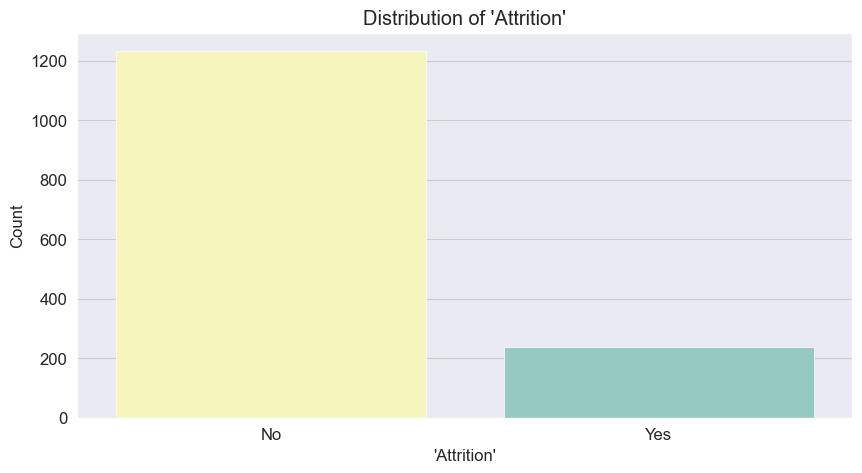



📌Ratio of unique values in 'BusinessTravel':
                   Ratio (%)
BusinessTravel              
Travel_Rarely          70.95
Travel_Frequently      18.84
Non-Travel             10.20
--------------------------------------------------


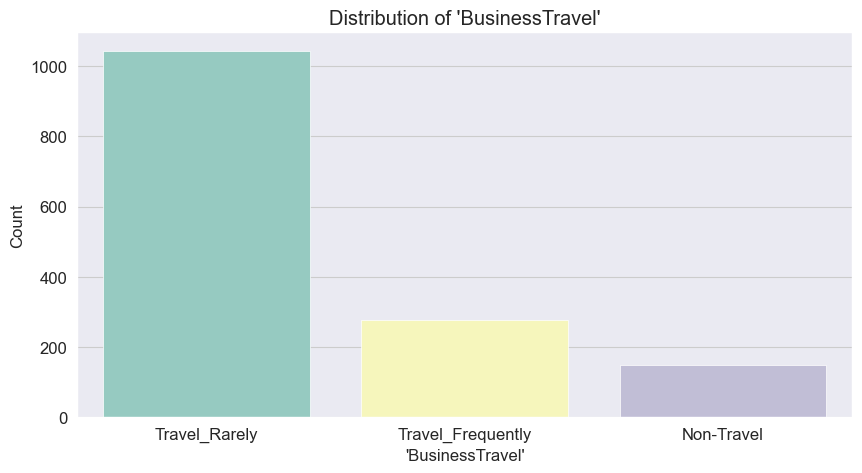



📌Ratio of unique values in 'Department':
                        Ratio (%)
Department                       
Research & Development      65.37
Sales                       30.34
Human Resources              4.29
--------------------------------------------------


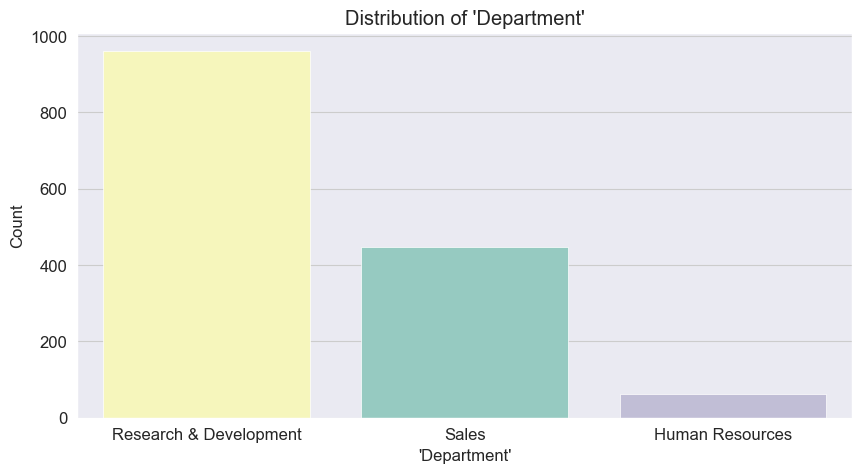



📌Ratio of unique values in 'EducationField':
                  Ratio (%)
EducationField             
Life Sciences         41.22
Medical               31.56
Marketing             10.82
Technical Degree       8.98
Other                  5.58
Human Resources        1.84
--------------------------------------------------


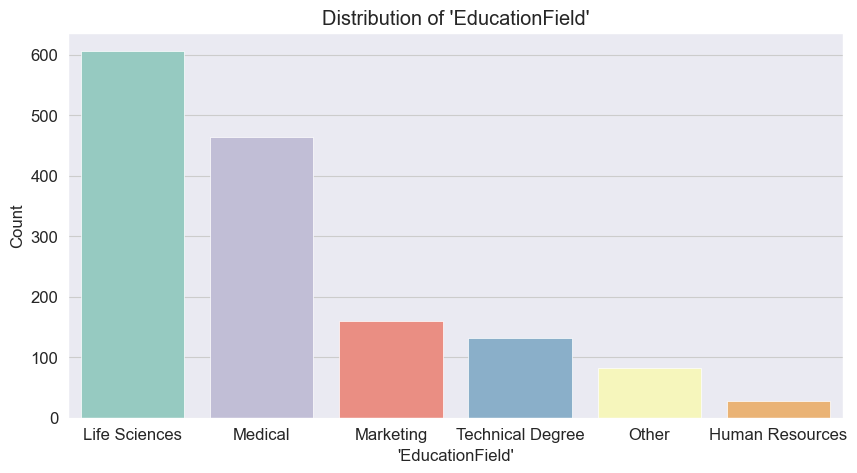



📌Ratio of unique values in 'Gender':
        Ratio (%)
Gender           
Male        60.00
Female      40.00
--------------------------------------------------


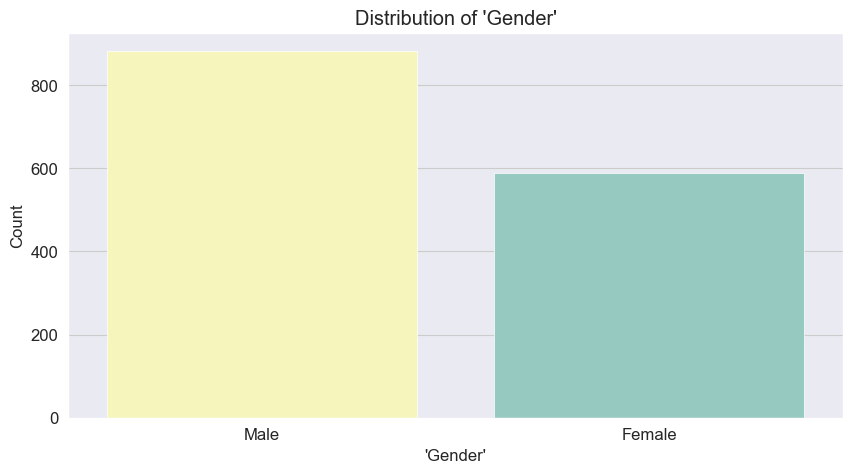



📌Ratio of unique values in 'JobRole':
                           Ratio (%)
JobRole                             
Sales Executive                22.18
Research Scientist             19.86
Laboratory Technician          17.62
Manufacturing Director          9.86
Healthcare Representative       8.91
Manager                         6.94
Sales Representative            5.65
Research Director               5.44
Human Resources                 3.54
--------------------------------------------------


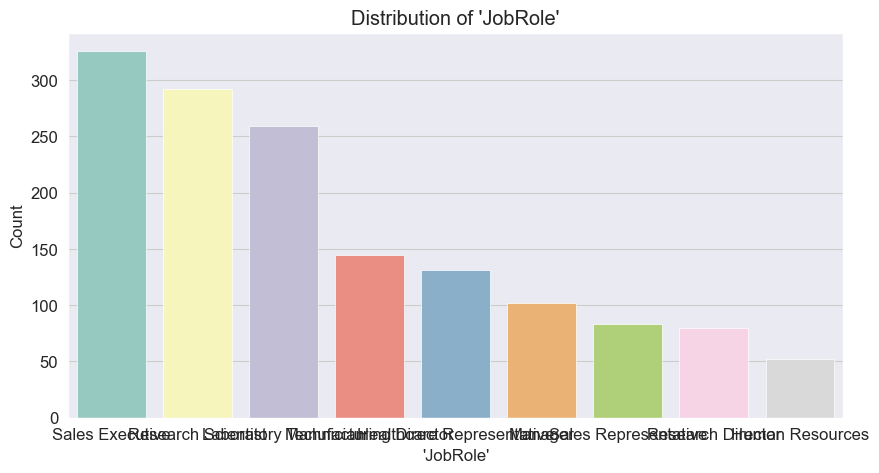



📌Ratio of unique values in 'MaritalStatus':
               Ratio (%)
MaritalStatus           
Married            45.78
Single             31.97
Divorced           22.24
--------------------------------------------------


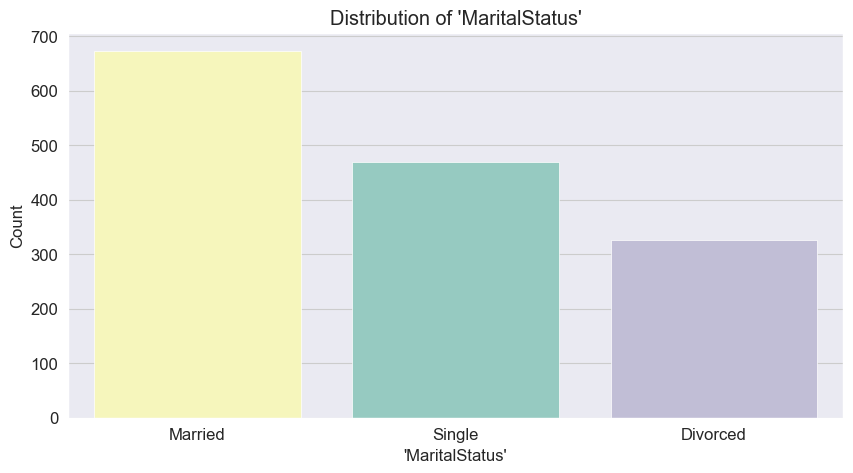



📌Ratio of unique values in 'Over18':
        Ratio (%)
Over18           
Y          100.00
--------------------------------------------------


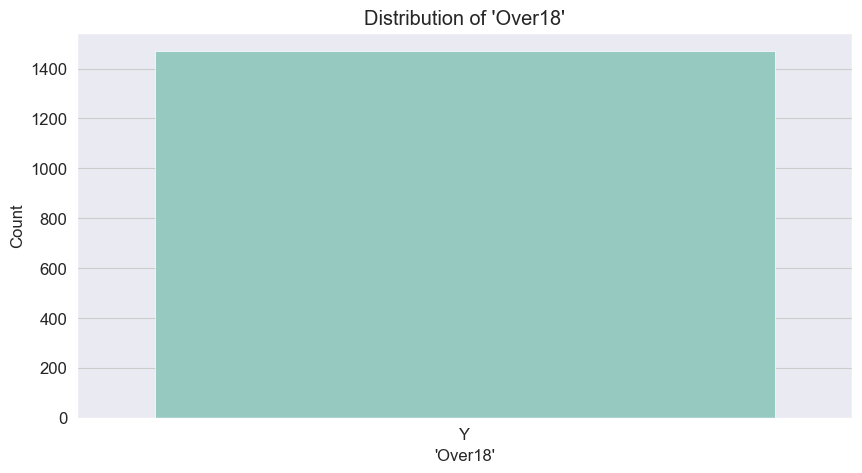



📌Ratio of unique values in 'OverTime':
          Ratio (%)
OverTime           
No            71.70
Yes           28.30
--------------------------------------------------


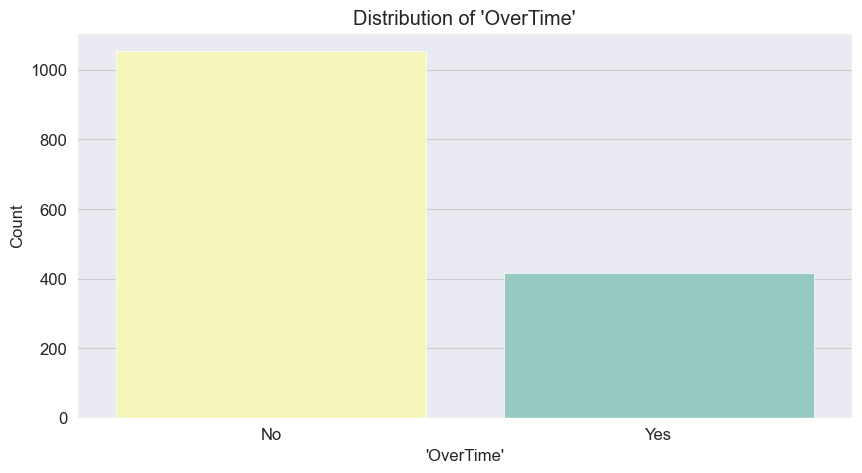



📌Ratio of unique values in 'Education':
           Ratio (%)
Education           
3              38.91
4              27.07
2              19.18
1              11.56
5               3.27
--------------------------------------------------


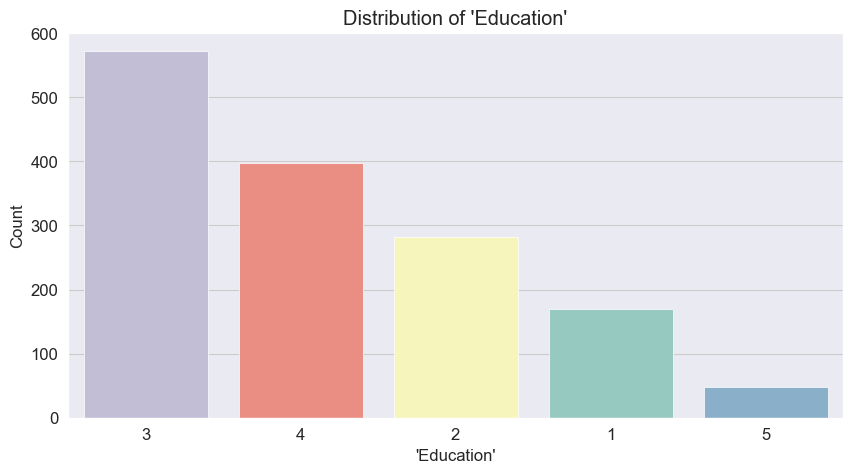



📌Ratio of unique values in 'EmployeeCount':
               Ratio (%)
EmployeeCount           
1                 100.00
--------------------------------------------------


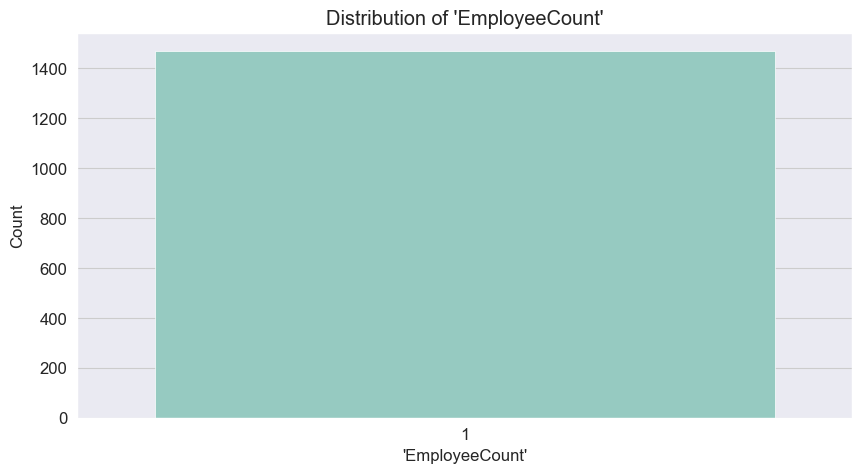



📌Ratio of unique values in 'EnvironmentSatisfaction':
                         Ratio (%)
EnvironmentSatisfaction           
3                            30.82
4                            30.34
2                            19.52
1                            19.32
--------------------------------------------------


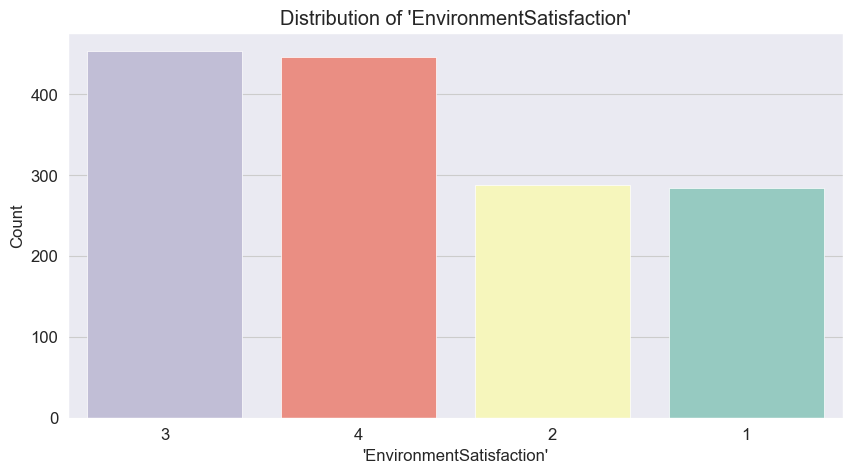



📌Ratio of unique values in 'JobInvolvement':
                Ratio (%)
JobInvolvement           
3                   59.05
2                   25.51
4                    9.80
1                    5.65
--------------------------------------------------


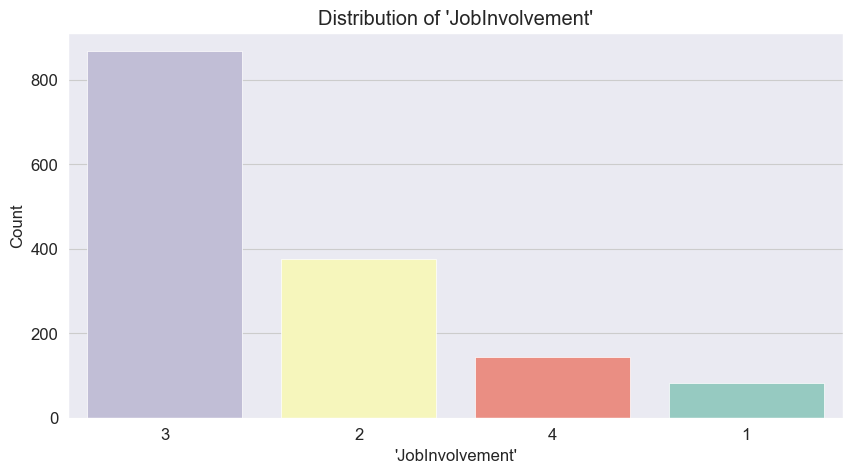



📌Ratio of unique values in 'JobLevel':
          Ratio (%)
JobLevel           
1             36.94
2             36.33
3             14.83
4              7.21
5              4.69
--------------------------------------------------


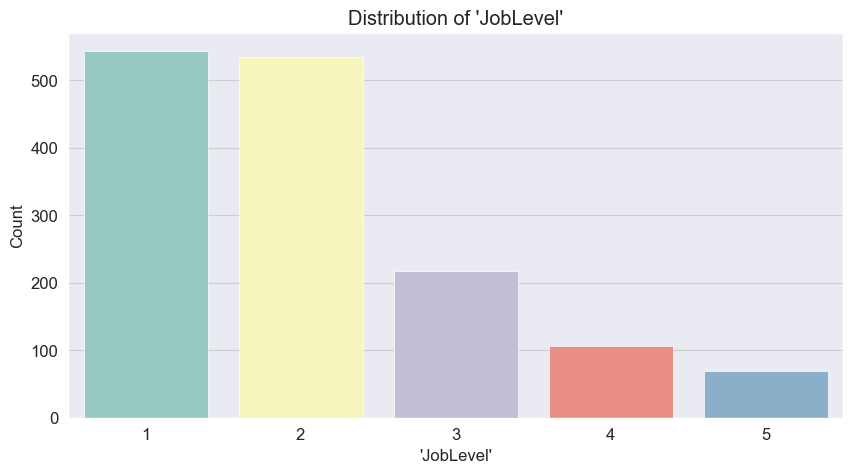



📌Ratio of unique values in 'JobSatisfaction':
                 Ratio (%)
JobSatisfaction           
4                    31.22
3                    30.07
1                    19.66
2                    19.05
--------------------------------------------------


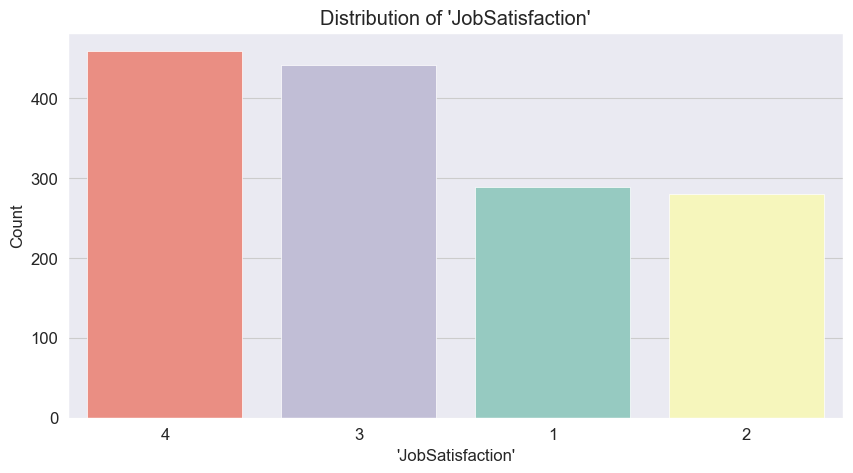



📌Ratio of unique values in 'NumCompaniesWorked':
                    Ratio (%)
NumCompaniesWorked           
1                       35.44
0                       13.40
3                       10.82
2                        9.93
4                        9.46
7                        5.03
6                        4.76
5                        4.29
9                        3.54
8                        3.33
--------------------------------------------------


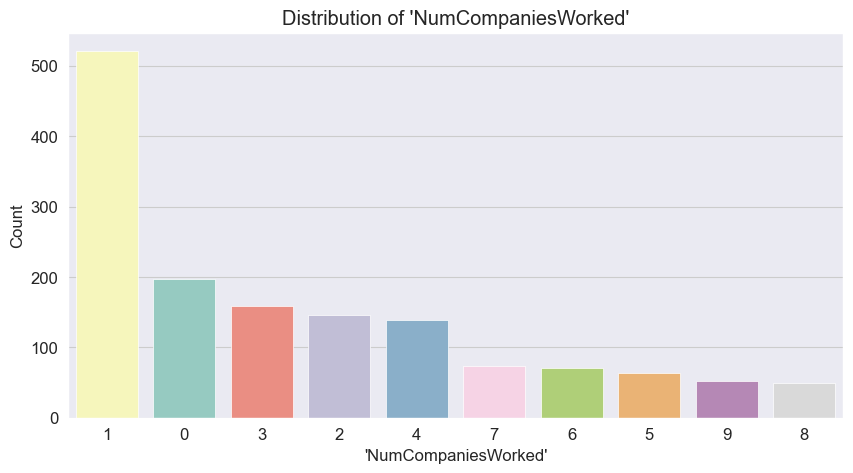



📌Ratio of unique values in 'PerformanceRating':
                   Ratio (%)
PerformanceRating           
3                      84.63
4                      15.37
--------------------------------------------------


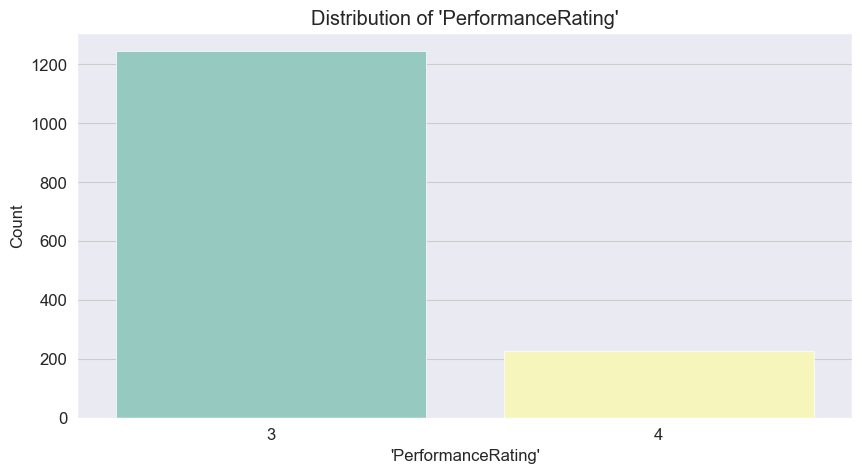



📌Ratio of unique values in 'RelationshipSatisfaction':
                          Ratio (%)
RelationshipSatisfaction           
3                             31.22
4                             29.39
2                             20.61
1                             18.78
--------------------------------------------------


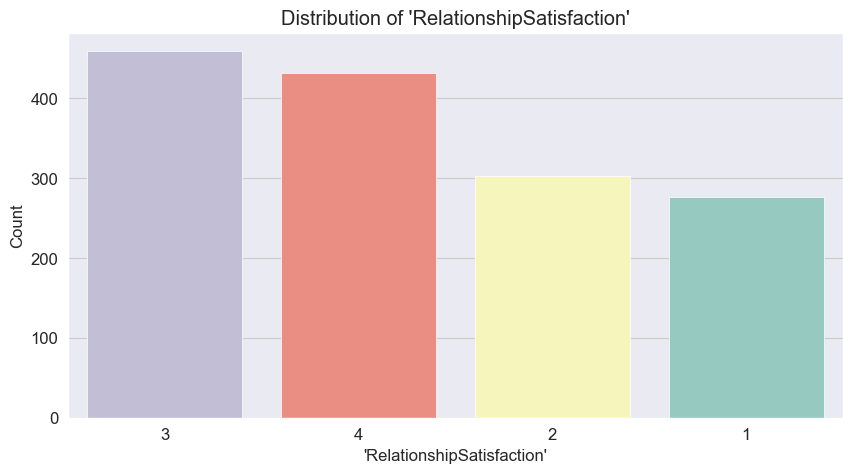



📌Ratio of unique values in 'StandardHours':
               Ratio (%)
StandardHours           
80                100.00
--------------------------------------------------


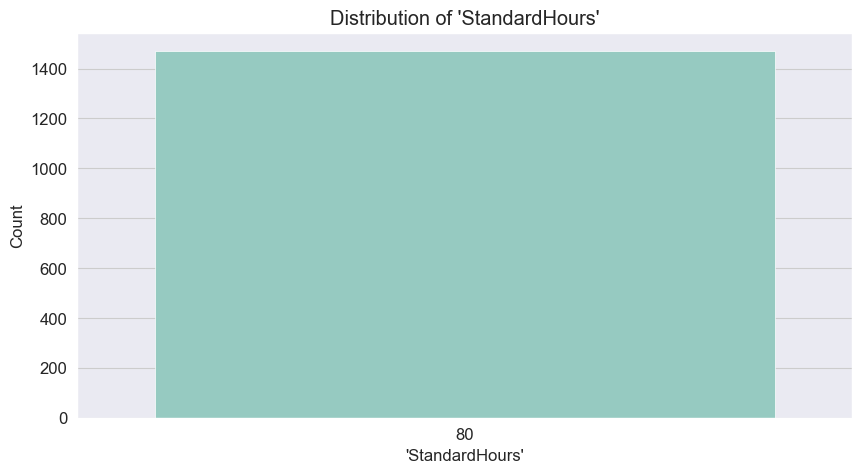



📌Ratio of unique values in 'StockOptionLevel':
                  Ratio (%)
StockOptionLevel           
0                     42.93
1                     40.54
2                     10.75
3                      5.78
--------------------------------------------------


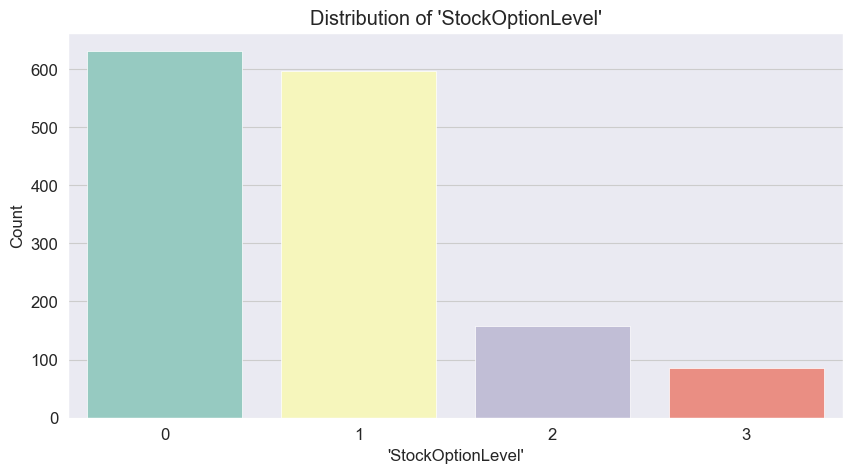



📌Ratio of unique values in 'TrainingTimesLastYear':
                       Ratio (%)
TrainingTimesLastYear           
2                          37.21
3                          33.40
4                           8.37
5                           8.10
1                           4.83
6                           4.42
0                           3.67
--------------------------------------------------


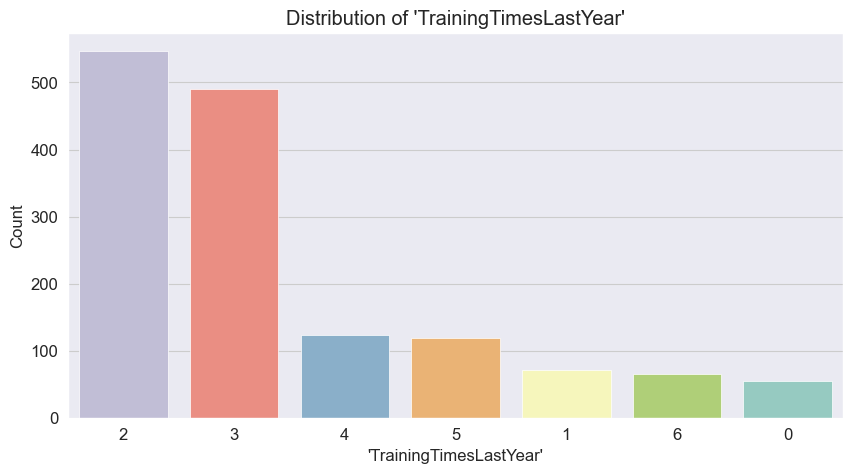



📌Ratio of unique values in 'WorkLifeBalance':
                 Ratio (%)
WorkLifeBalance           
3                    60.75
2                    23.40
4                    10.41
1                     5.44
--------------------------------------------------


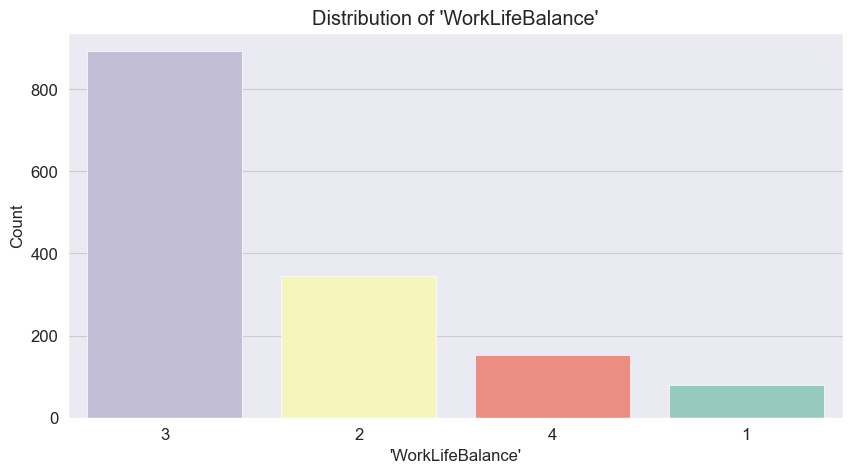

In [10]:
for i, col in enumerate(cat_cols):
  fig = cat_distribution(df, col, ratio=True)
  # save_figure(fig, f"{col}_distribution", f"cat_distributions")